In [ ]:
!pip install control

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
from control import matlab
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

----------------
##Discretização do sistema:
----------------

In [ ]:
##Função de Transferencia em tempo contínuo

numCont = [0,0,1,1]
denCont = [1,1,2,1]
sysCont = signal.TransferFunction(numCont,denCont)

print('Função de Transferencia em S:\n')
print('Numerador:  ',sysCont.num)
print('Denominador:',sysCont.den)

Função de Transferencia em S:

Numerador:   [1. 1.]
Denominador: [1. 1. 2. 1.]


In [ ]:
#Discretização utilizando diferentes métodos
metodos = ['bilinear','euler','backward_diff']

#Funções de transferencia do sistema em Z
for metodo in metodos:
  sysDisc = signal.cont2discrete((numCont,denCont), 0.1, metodo)
  numD = sysDisc[0][0]
  denD = sysDisc[1]
  print('\n')
  print('Função de Transferencia em Z utilizando o método ' + metodo +':')
  print('Numerador:  ',numD)
  print('Denominador:',denD)



Função de Transferencia em Z utilizando o método bilinear:
Numerador:   [ 0.00248786  0.0027248  -0.00201398 -0.00225092]
Denominador: [ 1.         -2.88555858  2.7914939  -0.90498756]


Função de Transferencia em Z utilizando o método euler:
Numerador:   [ 0.00000000e+00  3.10862447e-15  1.00000000e-02 -9.00000000e-03]
Denominador: [ 1.    -2.9    2.82  -0.919]


Função de Transferencia em Z utilizando o método backward_diff:
Numerador:   [ 9.81266726e-03 -8.92060660e-03 -4.44089210e-16  4.44089210e-16]
Denominador: [ 1.         -2.87243533  2.76538805 -0.89206066]


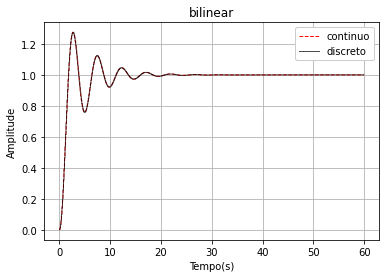

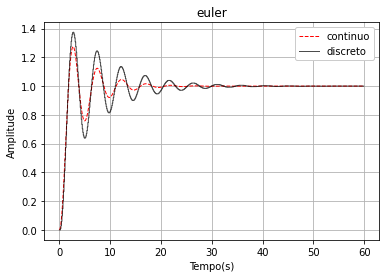

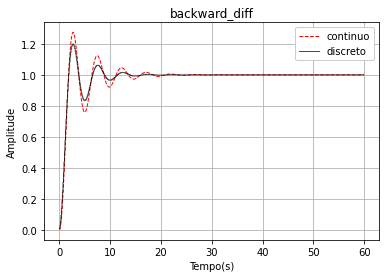

In [ ]:
#Comparação entre a precisão dos métodos para Ts = 0.1
metodos = ['bilinear','euler','backward_diff']

#Definição do vetor de tempo e da entrada
tempo = np.arange(0,60,0.1)
u = np.full(len(tempo),1)

#Resposta do sistema em tempo contínuo
tOutCont, yOutCont, x = signal.lsim(sysCont, u, tempo)

#Resposta do sistema discreto x contínuo
for metodo in metodos:
  sysDisc = signal.cont2discrete((numCont,denCont), 0.1, metodo)
  tOutDisc, yOutDisc = signal.dlsim(sysDisc, u, tempo)
  plt.plot(tOutCont, yOutCont,'r--', linewidth = 1, label = 'continuo')
  plt.step(tOutDisc, yOutDisc, 'k', alpha = 0.7, where='post', linewidth = 1, label = 'discreto')
  plt.title(metodo)
  plt.legend(loc='best', framealpha=1)
  plt.grid(0.5)
  plt.xlabel('Tempo(s)')
  plt.ylabel('Amplitude')
  plt.show()
  print('\n')

-------------------
##Método de Tustin com diferentes valores para T
-------------------

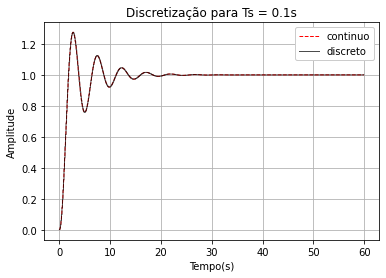

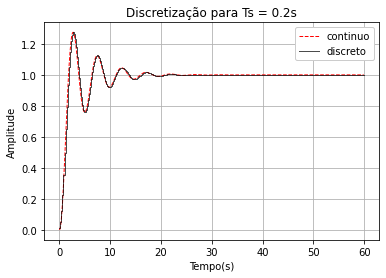

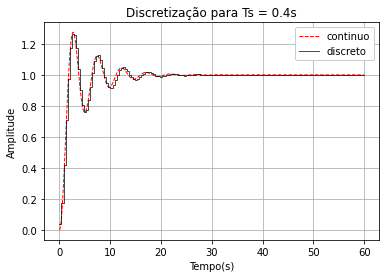

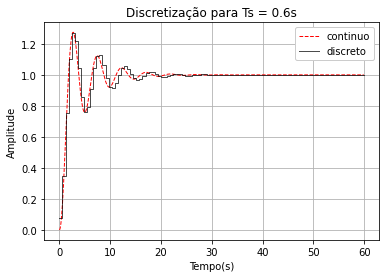

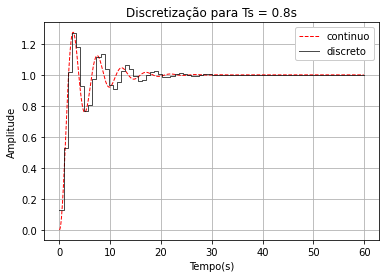

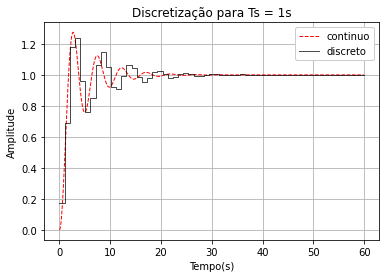

In [ ]:
periodos = [0.1, 0.2, 0.4, 0.6, 0.8, 1]

#Definição do vetor de tempo e da entrada
tempo = np.arange(0,60,0.1)
u = np.full(len(tempo),1)

#Resposta do sistema em tempo contínuo
tOutCont, yOutCont, x = signal.lsim(sysCont, u, tempo)

#Resposta do sistema discreto com diferentes valores de Ts
for periodo in periodos:
  sysDisc = signal.cont2discrete((numCont,denCont), periodo, 'bilinear')
  OutDisc, yOutDisc = signal.dlsim(sysDisc, u, tempo)
  plt.plot(tOutCont, yOutCont,'r--', linewidth = 1, label = 'continuo')
  plt.step(OutDisc, yOutDisc, 'k', alpha = 0.7, where='post', linewidth = 1, label = 'discreto')
  plt.legend(loc='best', framealpha=1)
  plt.title('Discretização para Ts = ' + str(periodo) + 's')
  plt.grid(0.5)
  plt.xlabel('Tempo(s)')
  plt.ylabel('Amplitude')
  plt.show()
  print('\n')

------------------
##Critério de Jury
------------------

In [ ]:
#Método para inverter um vetor qualquer

def inverseVector(vector):
  aux = vector[::-1]
  return aux

In [ ]:
#Criamos as duas primeiras linhas da matriz de Jury
coefficient = [1,-2.88556,2.79149,-0.90499]
jury = []
#Linha 1 com os coeficiente
jury.append(coefficient) 
#Linha 2 com os coeficientes invertidos
jury.append(inverseVector(coefficient))

In [ ]:
#Setup 
line = 2
odd_line = 0
column = len(coefficient)

#Montagem da tabela
while(column != 1):

  #vetor auxiliar para guardar os resultados da linha atual
  aux_vector = []
  # calculamos an/a0 atual
  mult = round((jury[line-2][column-1])/(jury[line-2][0]),5)
  #Calculando a linha atual
  for aux in range(column-1):
    aux_vector.append(round(jury[line-2][aux] - (jury[line-1][aux] * mult),5))

  #Armazenando a linha atual na matriz de Jury
  jury.append(aux_vector) 
  #Armazenando o inverso da linha atual na matriz de Jury
  jury.append(inverseVector(aux_vector))
  #Decrementando o valor que representa a coluna
  column = column - 1
  #Incrementando o valor que representa a linha
  line = line + 2 

In [ ]:
#Matriz de Jury do sistema

for i in range(len(jury)):
  print(jury[i])

[1, -2.88556, 2.79149, -0.90499]
[-0.90499, 2.79149, -2.88556, 1]
[0.18099, -0.35929, 0.18009]
[0.18009, -0.35929, 0.18099]
[0.0018, -0.00179]
[-0.00179, 0.0018]
[2e-05]
[2e-05]


In [ ]:
#Verificando o critério de Jury
while(1):

  #Se algum elemento presente em uma linha impar da primeira coluna for <=0
  if( jury[odd_line][0] <= 0 ):
    print('Existe raiz do polinômio fora do circulo unitário, logo o sistema é instável.')
    break

  #Incremento na variável que representa a linha impar antual
  odd_line = odd_line + 2

  #Se a linha impar == ultima linha --> atende ao critério de estabilidade
  if(odd_line == line):
    print('As raízes do polinomio estão todas dentro do circulo unitário, logo o sistema é estável.')
    break

As raízes do polinomio estão todas dentro do circulo unitário, logo o sistema é estável.


###Podemos comprovar a posição dos polos e zeros observando o próximo plot

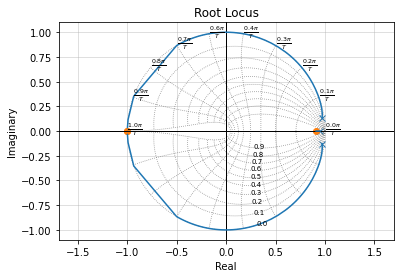

In [ ]:
#Plot do lugar geométrico das raízes do sistema

sysCont = matlab.TransferFunction([0,0,1,1], [1,1,2,1])
sysDisc = matlab.c2d(sysCont, 0.1, 'bilinear')

rlocus = matlab.rlocus(sysDisc)
plt.grid(alpha = 0.5)
plt.show()

-------------
#Controlador P.I.D.
-------------

In [ ]:
## Bloco de erro

def erro(e0, e1, e2, setpoint, output):

  eAtual = setpoint - output
  e2 = e1
  e1 = e0
  e0 = eAtual

  return e0, e1, e2

In [ ]:
#Bloco PID

def PID(e0, e1, e2, uAnterior):

  kp = 5
  ki = 2.8
  kd = 0.000001

  u = uAnterior + kp*(e0 - e1) + (ki*0.1)*(e0) + (kd/0.1)*(e0 - e1 - e2)
  return u

In [ ]:
#Bloco do sistema

def system(discreteSystem, inputSignal, timeStep):

  tOutSystem, yOutSystem = signal.dlsim(discreteSystem, inputSignal, timeStep)
  return tOutSystem, yOutSystem

In [ ]:
#Set up das condições iniciais do sistema

#Valores de erro acumulados com valores inicias nulos
e0 = 0
e1 = 0
e2 = 0

#Valores iniciais para setpoint e saída
setPoint = 1

#Valor do time step (fixo)
Ts = 0.1

#Instantes de tempo (0s --> 60s com passo = Ts --> 600 instantes de tempo)
instanteTempo = 0

#Vetor com os intantes de tempo (tamanho 600)
tempo = np.arange(0, 60, Ts)

#Vetor com as entradas 
u = np.zeros(len(tempo))
u[0] = 1

#Vetor com as saídas
ysOut = np.zeros(len(tempo))
tsOut = np.zeros(len(tempo))

#Modelagem do sistema discreto
num = [0,0,1,1]
den = [1,1,2,1]
dt = 0.1
discreteSystem = signal.cont2discrete((num,den), dt, 'bilinear')

In [ ]:
#Sistema em malha fechada

while(instanteTempo < len(tempo)-1):

  #Resposta do sistema
  tsOut, ysOut = system(discreteSystem, u, tempo)
  output = ysOut[instanteTempo]

  #Valor de erro para o instante atual
  e0, e1, e2 = erro(e0, e1, e2, setPoint, output)

  #Erro + entrada anterior usadas no controlador para gerar a próxima entrada do sistema
  u[instanteTempo + 1] = PID(e0, e1, e2, output)

  instanteTempo += 1

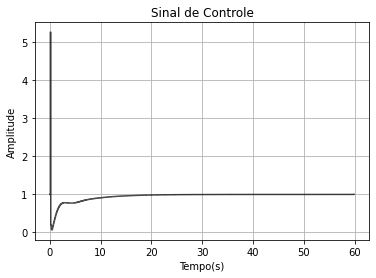

In [ ]:
#Plot do sinal de controle

plt.step(tsOut, u, 'k', alpha = 0.7 ,where='post', linewidth = 1.5)
plt.title('Sinal de Controle')
plt.grid(0.5)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
#Definição do vetor de tempo e da entrada
tempo = np.arange(0,60,0.1)
entrada = np.full(len(tempo),1)

#Resposta do sistema em M.A
tOutDisc, yOutDisc = signal.dlsim(discreteSystem, entrada, tempo)

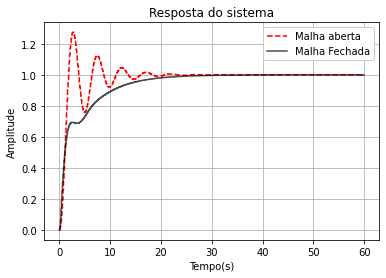

In [ ]:
#Resposta do sistema: MF x MA

plt.step(tOutDisc, yOutDisc,'r--',where='post', label = 'Malha aberta', linewidth = 1.5)
plt.step(tsOut, ysOut, 'k', alpha = 0.7,where='post', label = 'Malha Fechada' , linewidth = 1.5)
plt.legend(loc='best', framealpha=1)
plt.title('Resposta do sistema')
plt.grid(0.5)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

-------------------
#DEADBEAT
-------------------

In [ ]:
## Bloco de erro

def erroDB(setpoint, output):
  e = setpoint - output
  return e

In [ ]:
#Bloco que representa o controlador

def DeadBeat(controllerDbTf, erro, tempo):
  tOutController, yOutController = signal.dlsim(controllerDbTf, erro, tempo)
  return tOutController,yOutController

In [ ]:
#Bloco que representa o Sistema

def system(discreteSystem, inputSignal, timeStep):
  tOutSystem, yOutSystem = signal.dlsim(discreteSystem, inputSignal, timeStep)
  return tOutSystem, yOutSystem

In [ ]:
#Set up das condições iniciais do sistema

#Valores iniciais para setpoint e saída
setPoint = 1

#Valor do time step
Ts = 0.1

#Instantes de tempo (0s --> 30s com passo = Ts --> 300 instantes de tempo)
instanteTempo = 0

#Vetor com os intantes de tempo (tamanho 300)
tempo = np.arange(0, 30, Ts)

#Valores de erro acumulados com valores inicias nulos
e = np.zeros(len(tempo))
e[0] = setPoint
#Vetor com o sinal de controle
u = np.zeros(len(tempo))

#Vetor com as saídas  
ysOut = np.zeros(len(tempo)) #Saida do sistema
ycOut = np.zeros(len(tempo)) #Saida do controlador
tsOut = np.zeros(len(tempo)) #Instantes de tempo

#Modelagem da função de transferencia do controlador em Z
numDb = [ 1.        , -2.88555858,  2.7914939 , -0.90498756]
denDb = [0.00248786, 0.00023694, -0.00473878, -0.00023694, 0.00225092]
controllerDbTf = signal.TransferFunction(numDb,denDb, dt = 0.1)

#Modelagem da função de transferencia do sistema em Z
numSDb = [ 0.00248786,  0.0027248 , -0.00201398, -0.00225092] 
denSDb = [ 1.        , -2.88555858,  2.7914939 , -0.90498756]
systemDbTf = signal.TransferFunction(numSDb, denSDb, dt = 0.1)

In [ ]:
#Sistema em malha fechada

while(instanteTempo < len(tempo)):

  #Resposta do controlador
  tsOut, ycOut = DeadBeat(controllerDbTf, e, tempo)
  output = ycOut[instanteTempo]
  u[instanteTempo] = output

  #Resposta do sistema
  tsOut, ysOut = system(systemDbTf, u, tempo)
  output = ysOut[instanteTempo]

  #Valor de erro para o instante atual
  e[instanteTempo] = erroDB(setPoint, output)
  
  instanteTempo += 1

In [ ]:
#Definição do vetor de tempo e entrada
u = np.full(len(tempo), 1)

#Resposta do sistema em M.A ao degrau
tOutDisc, yOutDisc = signal.dlsim(systemDbTf, u, tempo)

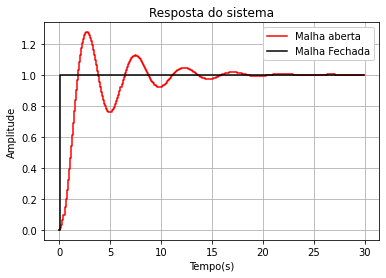

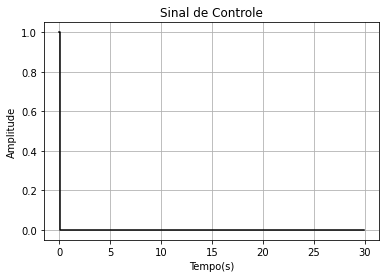

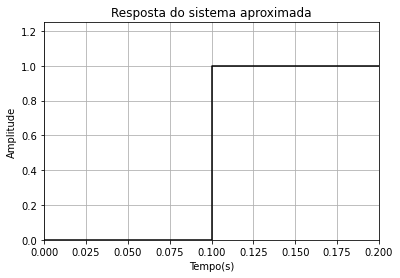

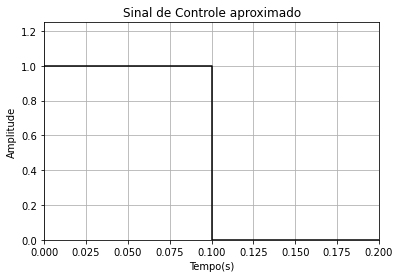

In [ ]:
#Plot da resposta do sistema: MA x MF
plt.step(tOutDisc, yOutDisc,'r', where='post', label = 'Malha aberta', linewidth = 1.5)
plt.step(tsOut, ysOut, 'k', where='post', label = 'Malha Fechada', linewidth = 1.5)
plt.legend(loc='best', framealpha=1)
plt.title('Resposta do sistema')
plt.grid(0.5)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

print('\n')
#Plot do sinal de controle
plt.step(tsOut, e, 'k', where='post', label = 'Malha Fechada', linewidth = 1.5)
plt.title('Sinal de Controle')
plt.grid(0.5)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

print('\n')
#Plot do critério de desempenho do controlador
plt.step(tsOut, ysOut, 'k', where='post', label = 'Malha Fechada', linewidth = 1.5)
plt.xlim(0, 0.2)
plt.ylim(0, 1.25)
plt.title('Resposta do sistema aproximada')
plt.grid(0.5)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

print('\n')
#Sinal de controle aproximado
plt.step(tsOut, e, 'k', where='post', label = 'Malha Fechada', linewidth = 1.5)
plt.xlim(0, 0.2)
plt.ylim(0, 1.25)
plt.title('Sinal de Controle aproximado')
plt.grid(0.5)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()